(50L, 2L)
[[ 3.38156267  3.38911268]
 [ 4.52787538  5.8541781 ]
 [ 2.65568187  4.41199472]
 [ 2.76523467  3.71541365]
 [ 2.84656011  4.17550645]]


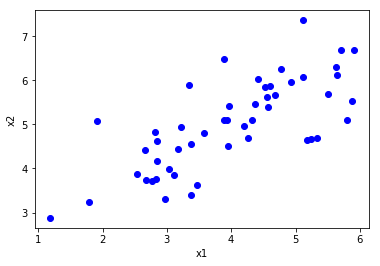

In [1]:
#本文是pca降维
#load data
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

data = sio.loadmat('ex7data1.mat')
X = data['X']
print X.shape
print X[:5]

plt.plot(X[:,0],X[:,1],'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [2]:
#feature normalize 特征归一化
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X,axis=0) #mean value of every feature
    sigma = np.std(X,axis=0)#std of every feature
    X_norm = (X - mu) / sigma
    
    return X_norm,mu,sigma 


In [3]:
#complete the pca
def pca(data_normal):
    m,n = data_normal.shape
    sigma = data_normal.T.dot(data_normal) / m  #np.cov()
    U,S,V = np.linalg.svd(sigma)  #np.linalg.eig()
    return U,S,V


In [4]:
X_norm,mu,sigma = featureNormalize(X)
U,S,V = pca(X_norm)
print "you should expect to see -0.707107 -0.707107)\n"
print U[0,0],U[1,0]



you should expect to see -0.707107 -0.707107)

-0.707106781187 -0.707106781187


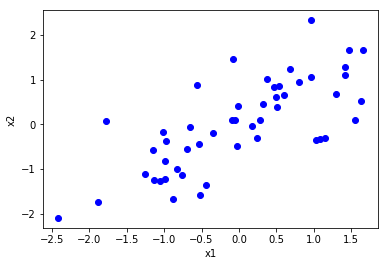

In [5]:
plt.plot(X_norm[:,0],X_norm[:,1],'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [6]:
#降维2->1
def projectData(x,u,k):
    z = np.zeros((x.shape[0],k))
    u_reduce = u[:,:k] #get the first k line
    z = x.dot(u_reduce) #[m,n]*[n,k] = [m,k]
    return z
#还原 1-->2
def recoverData(z,u,k):
    x_rec = np.zeros((z.shape[0],u.shape[0]))
    u_reduce = u[:,:k]
    x_rec = z.dot(u_reduce.T) #[m,k]*[k,n] = [m,n]
    return x_rec

    
    

In [7]:
Z = projectData(X_norm,U,k=1)  #n-->k
print "(this value should be about 1.481274)"
print Z[0]
X_rec = recoverData(Z,U,k=1) # get back k--->n
print "(this value should be about  -1.047419 -1.047419)"
print X_rec[0,0],X_rec[0,1]




(this value should be about 1.481274)
[ 1.49631261]
(this value should be about  -1.047419 -1.047419)
-1.05805279222 -1.05805279222


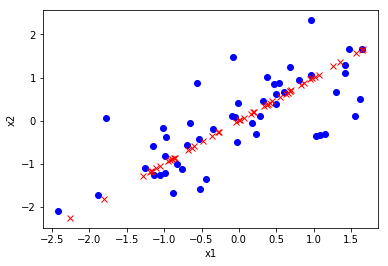

In [8]:
#可视化一下
plt.plot(X_norm[:,0],X_norm[:,1],'bo')
plt.plot(X_rec[:,0],X_rec[:,1],'rx')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

